In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
X = x_train[87]

In [8]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X.shape

(28, 28)

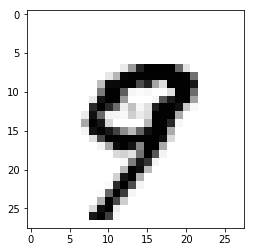

In [10]:
plt.imshow(X, cmap='Greys')

In [11]:
y_train[87]

9

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [15]:
from keras.utils import np_utils

In [16]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [17]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(400, input_dim=784))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(200))
model.add(Activation('sigmoid'))

In [22]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [37]:
784*400+400

314000

In [38]:
400*200+200

80200

In [39]:
200*10+10

2010

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0833 - acc: 0.3578
Epoch 2/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0653 - acc: 0.6236
Epoch 3/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0485 - acc: 0.7517
Epoch 4/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0365 - acc: 0.8226
Epoch 5/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0287 - acc: 0.8627
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0238 - acc: 0.8807
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0206 - acc: 0.8915
Epoch 8/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0184 - acc: 0.8992
Epoch 9/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0169 - acc: 0.9057
Epoch 10/20
60000/60000 [==============================] - 10s 168us/step - loss: 

In [29]:
from ipywidgets import interact_manual

In [30]:
predict = model.predict_classes(x_test)

In [31]:
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 2


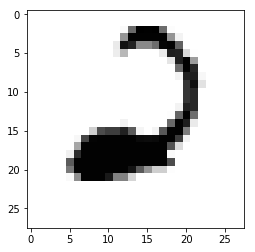

In [33]:
test(9487)

In [34]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [35]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 120us/step


In [36]:
print('loss:', score[0])
print('正確率:', score[1])

loss: 0.011116778644174338
正確率: 0.9312
